In [2]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [10]:
from PIL import Image
data = []
labels = []
classes = 43
cur_path = "DataSet/Train"

for i in range(classes):
    path = os.path.join('DataSet/', 'Train',str(i))
    images = os.listdir(path)
#DataSet/Train
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#lists into numpy arrays

data = np.array(data)
labels = np.array(labels)

In [20]:
print(data[0], labels[0])

[[[186 164 164]
  [172 127 106]
  [172 119  85]
  ...
  [179 122  88]
  [182 130  93]
  [182 127  94]]

 [[173 151 137]
  [160 114  89]
  [166 116  84]
  ...
  [168 122  89]
  [168 126  93]
  [167 124  94]]

 [[178 155 148]
  [176 148 135]
  [181 146 136]
  ...
  [171 158 149]
  [173 159 149]
  [174 161 151]]

 ...

 [[ 91  94 100]
  [ 91  92  95]
  [ 91  94  90]
  ...
  [101 100  96]
  [107 101  98]
  [110 102  97]]

 [[ 99 100 105]
  [ 97  98  98]
  [ 96 100  98]
  ...
  [100 101  94]
  [107 106 102]
  [117 112 107]]

 [[102 105 100]
  [104 106 101]
  [102 102 100]
  ...
  [103 102  98]
  [106 108 104]
  [108 109 106]]] 0


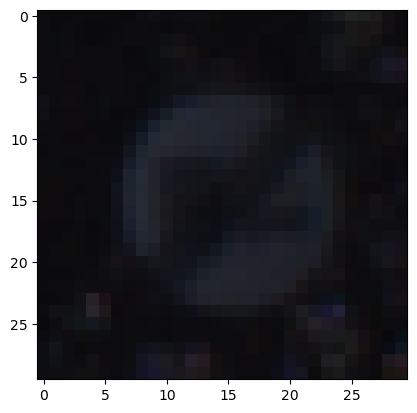

In [17]:
import matplotlib.pyplot as plt

# Display the sample image
plt.imshow(image)
plt.axis('on')
plt.show()

In [18]:
image_index = data.tolist().index(image.tolist())
label = labels[image_index]
print(label)

42
